<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Lifetime Value(CLTV)
"Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship" (Source). CLTV demonstrates the implications of acquiring long-term customers compare to short-term customers. Customer lifetime value (CLV) can help us to answers the most important questions about sales to every company: 
- How to Identify the most profitable customers?
- How can a company offer the best product and make the most money?
- How to segment profitable customers?
- How much budget need to spend to acquire customers?
##Calculate Customer Lifetime Value
There are lots of approaches available for calculating CLTV. Everyone has their own view on it. 
- We can compute it by adding profit/revenue from customers in a given cycle. For Example, if the customer is associated with the business for the last 3 years, we can sum all the profit in this 3 years. We can average the profit yearly or half-yearly or monthly, but in this approach, we won's be able to build a predictive model for new customers.
- Build a regression model for existing customers. Take recent six-month data as independent variables and total revenue over three years as a dependent variable and build a regression model on this data.
- CLTV can also implement using RFM(Recency, Frequency, Monetary) values. For more details, you can refer to my tutorial.
- Using the following equation: CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
    -  Customer Value = Average Order Value * Purchase Frequency
    - Average Order Value(AOV) = Total Revenue / Total Number of Orders. AOV represents the mean amount of revenue that the customer spends on an order.
    - Purchase Frequency =  Total Number of Orders / Total Number of Customers. It represents the average number of orders placed by each customer.
    - Churn Rate: Churn Rate is the percentage of customers who have not ordered again.
    - Customer Lifetime = 1/ churn rate
    - Churn Rate= 1-Repeat Rate

In [49]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import io
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


In [3]:
data = pd.read_excel(io.BytesIO(uploaded.get('online_retail_II.xlsx'))) #reading the excel file#

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2


In [5]:
data.shape

(525461, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      525461 non-null  object        
 8   Brand        525461 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 36.1+ MB


In [7]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.557225
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
CustomerID     20.539488
Country         0.000000
Brand           0.000000
dtype: float64

In [8]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [9]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
CustomerID     104999
Country             0
Brand               0
dtype: int64

In [10]:
data[data["CustomerID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
263,489464,21733,85123a mixed,-96,2020-12-01 10:52:00,0.00,NaN,United Kingdom,0
283,489463,71477,short,-240,2020-12-01 10:52:00,0.00,NaN,United Kingdom,0
284,489467,85123A,21733 mixed,-192,2020-12-01 10:53:00,0.00,NaN,United Kingdom,2
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2020-12-01 11:49:00,0.55,NaN,United Kingdom,1
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2020-12-01 11:49:00,0.85,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2021-12-09 16:35:00,8.47,NaN,United Kingdom,0
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2021-12-09 16:35:00,4.21,NaN,United Kingdom,0
525147,538154,DOT,DOTCOM POSTAGE,1,2021-12-09 16:35:00,85.79,NaN,United Kingdom,0
525234,538161,46000S,Dotcom sales,-100,2021-12-09 17:25:00,0.00,NaN,United Kingdom,0


In [11]:
data.iloc[575:, :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,2020-12-01 11:48:00,12.75,15614.0,United Kingdom,0
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2020-12-01 11:49:00,0.55,NaN,United Kingdom,1
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2020-12-01 11:49:00,0.85,NaN,United Kingdom,0
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2020-12-01 11:50:00,1.25,12533.0,Germany,0
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2020-12-01 11:50:00,0.55,12533.0,Germany,0
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2021-12-09 20:01:00,2.95,17530.0,United Kingdom,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,2
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2021-12-09 20:01:00,3.75,17530.0,United Kingdom,0


In [12]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [13]:
data.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
Brand          0
dtype: int64

In [14]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2020-12-01 07:45:00,6.95,13085.0,United Kingdom,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2020-12-01 07:45:00,2.10,13085.0,United Kingdom,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,2
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2020-12-01 07:45:00,1.65,13085.0,United Kingdom,1
6,489434,21871,SAVE THE PLANET MUG,24,2020-12-01 07:45:00,1.25,13085.0,United Kingdom,0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2020-12-01 07:45:00,5.95,13085.0,United Kingdom,0
8,489435,22350,CAT BOWL,12,2020-12-01 07:46:00,2.55,13085.0,United Kingdom,2
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2020-12-01 07:46:00,3.75,13085.0,United Kingdom,3


Removing Duplicates
Sometimes we get a messy dataset. we may have to deal with duplicates, which will skew your analysis. 

In [15]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

Let's Jump into Data Insights

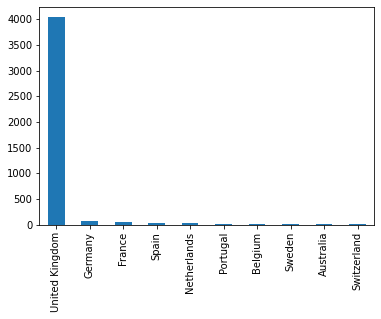

In [16]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')
plt.show()

In [17]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [18]:
temp_df.head(10)

,Country
United Kingdom,379423
EIRE,8710
Germany,8129
France,5710
Netherlands,2769
Spain,1278
Switzerland,1187
Belgium,1054
Portugal,1024
Channel Islands,906


In [19]:
names  = temp_df.index

In [20]:
px.scatter(temp_df, y = "Country", color = names, title = "Count of Countries")

In [21]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

Country
United Kingdom    4344969
Denmark            227030
Netherlands        181823
EIRE               177044
Germany            107133
France              73490
Sweden              52100
Switzerland         22053
Australia           20053
Spain               18332
Name: Quantity, dtype: int64

In [23]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [24]:
countries = data["Country"].unique()

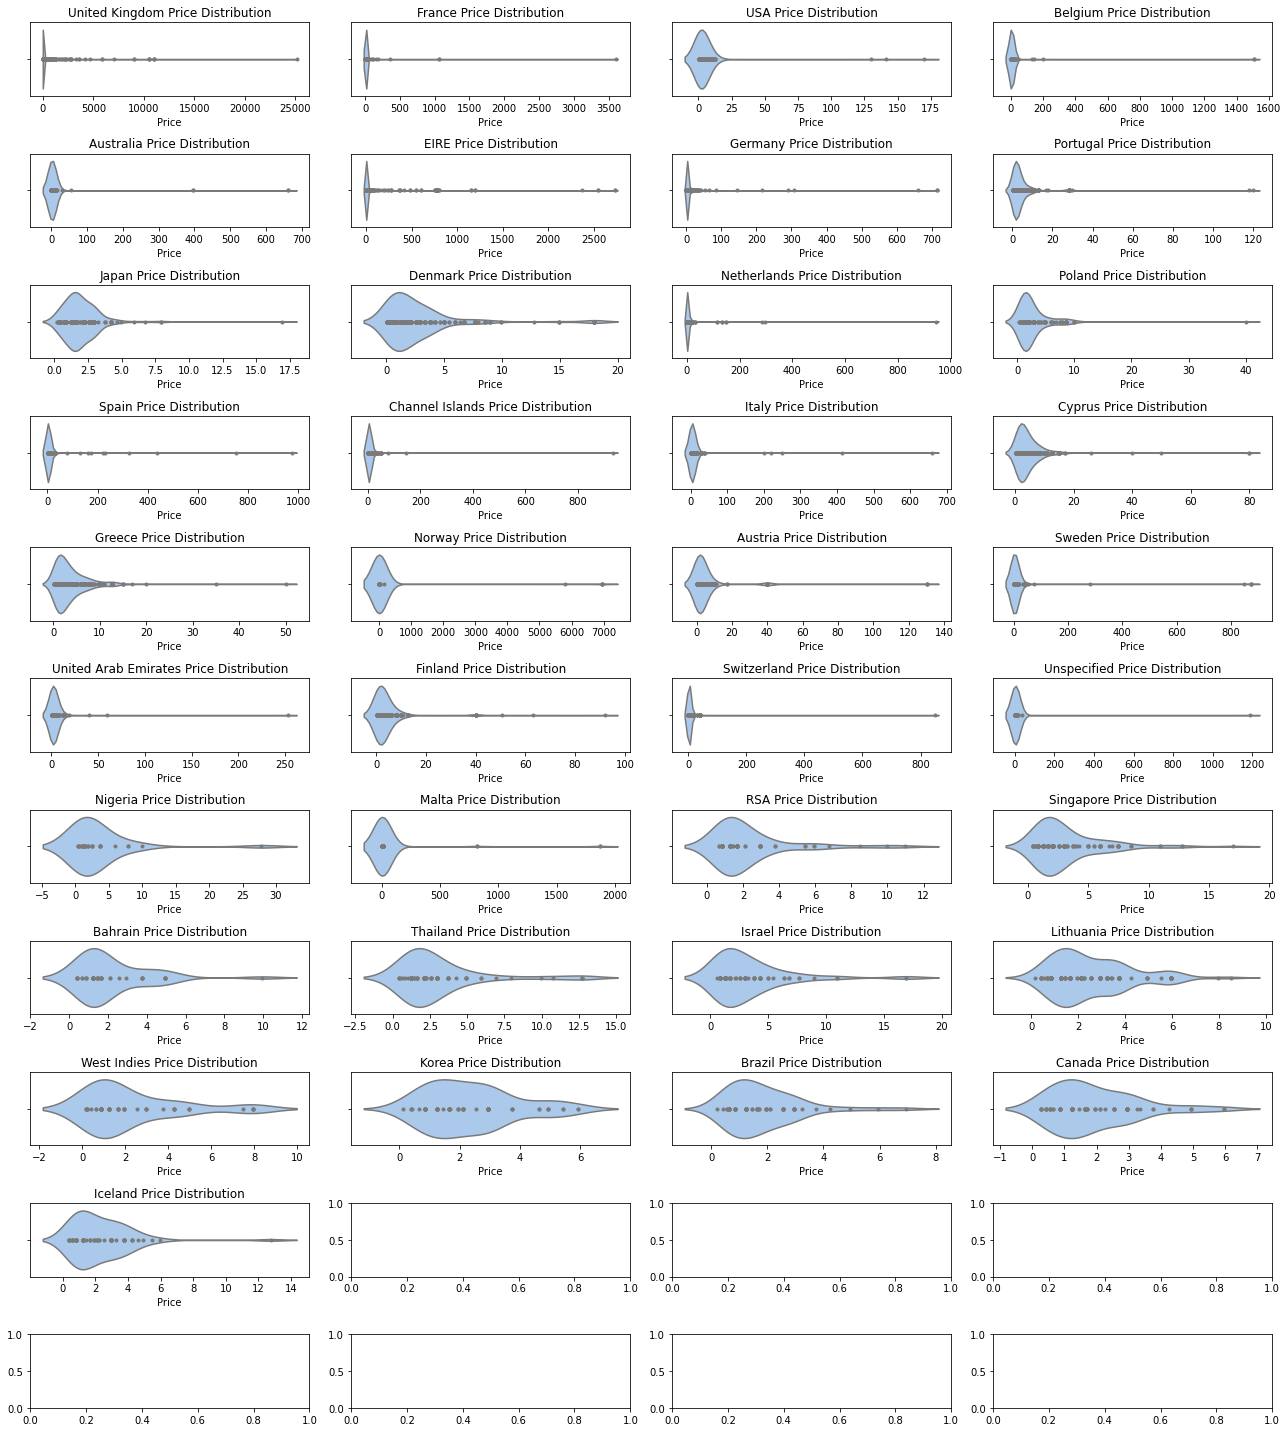

In [26]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [28]:
#Total Number of Unique Invoices 
len(data["Invoice"].unique())

23576

In [29]:
temp_invoice_df = data.groupby("Invoice").sum()

In [30]:
temp_invoice_df.reset_index(inplace = True)

In [31]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,Invoice,Quantity
11079,518505,87167
13416,524174,87167
3063,497946,83774
4378,501534,63974
2095,495194,63302
4692,502269,40000
1603,493819,25018
1047,491812,20524
7528,509472,17766
246,490018,17520


In [32]:
data.groupby(["Invoice"]).mean().head(15).iloc[:, [1]].sort_values("Price", ascending = False)

,Price
Invoice,
489444,141.000000
489447,130.000000
489434,4.081250
489436,3.730526
489437,3.628261
489439,3.560000
489440,3.150000
489446,3.118519
489441,3.042500


I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 536374 & 536369 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [33]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand
126,489444,POST,POSTAGE,1,2020-12-01 09:55:00,141.0,12636.0,USA,2
173,489447,POST,POSTAGE,1,2020-12-01 10:10:00,130.0,12362.0,Belgium,0


As we can see above, These 2 invoices with invoice number 536369 and 536374 had only single transaction, that's why the average price was too high.

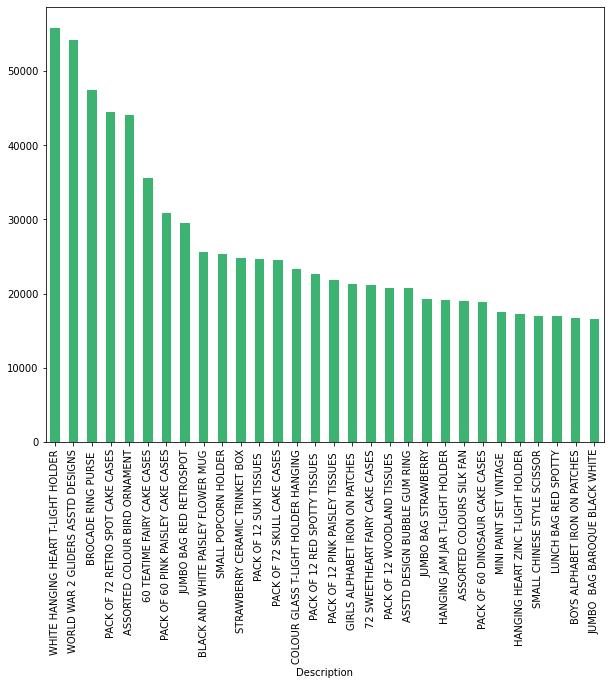

In [34]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

**Top 8 Countries With Most Transactions**

In [35]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [36]:
temp = pd.DataFrame(temp)

In [37]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

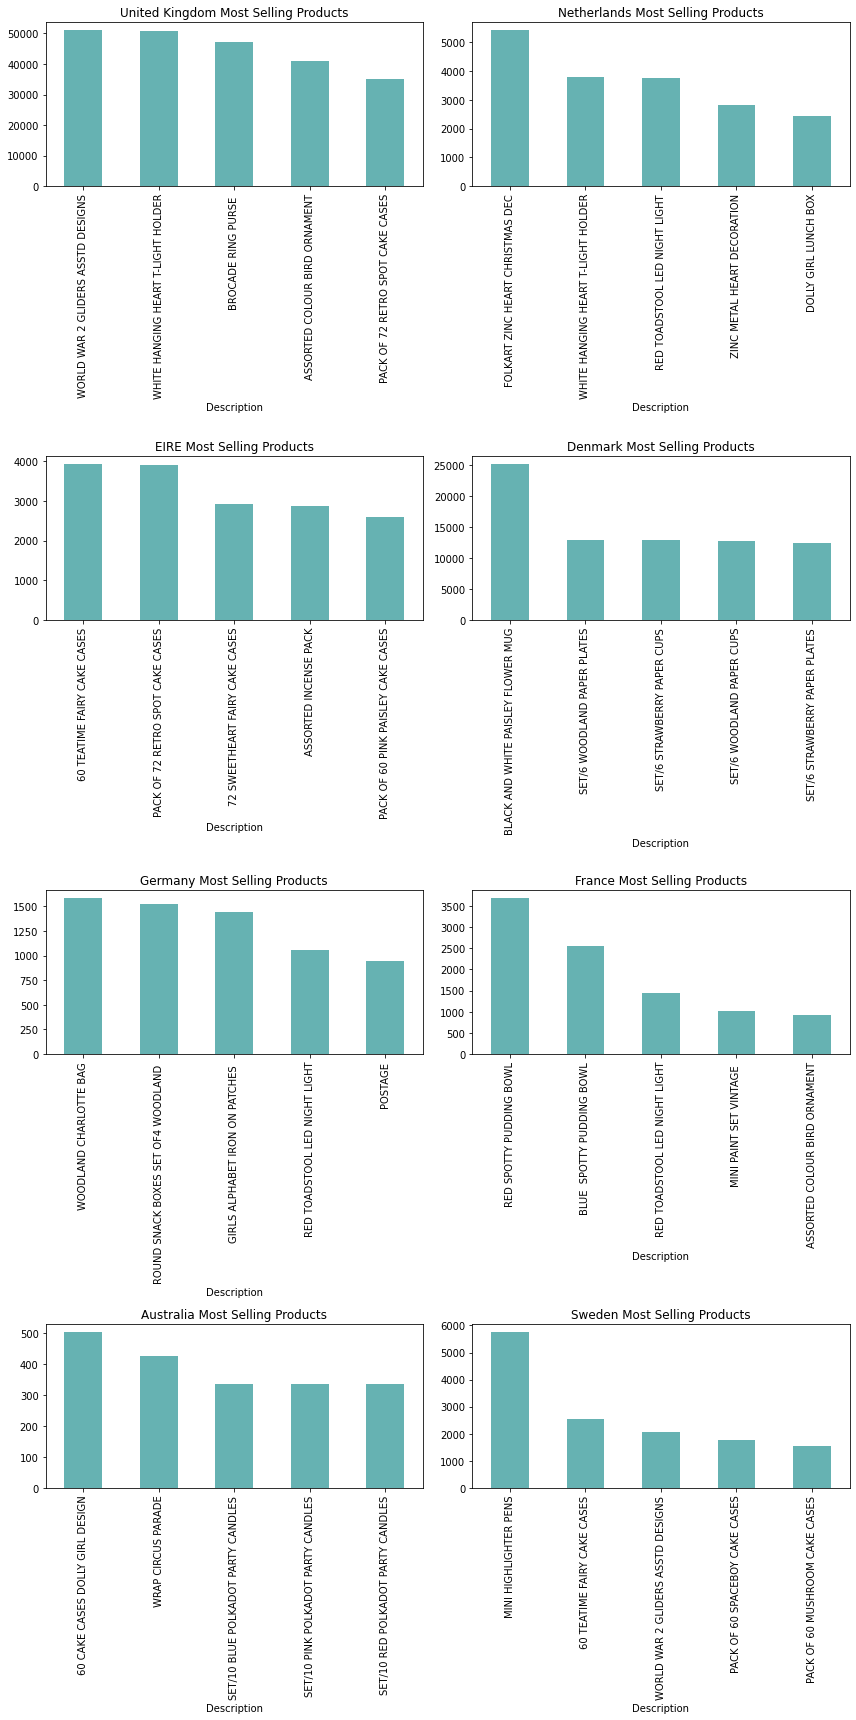

In [38]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

#### Filter required Columns
Here, we can filter the necessary columns for calculating CLTV. We only need here five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.
 - CustomerID will uniquely define our customers.
 - InvoiceDate help us calculate numbers of days customer stayed with your product.
 - InvoiceNo helps us to count the number of time transaction performed(frequency).
 - Quantity is purchased item units in each transaction
 - UnitPrice of each unit purchased by the customer will help us to calculate the total purchased amount.

Here, we are going to perform the following operations:

Calculate the number of days between the present date and the date of last purchase from each customer.
Calculate the number of orders for each customer.
Calculate sum of purchase price for each customer.

In [42]:
# Preparing the Data 
data=data[~data["Invoice"].astype(str).str.contains("C",na=False)]
data=data[(data["Quantity"]>0)]
data.dropna(inplace=True)
data["TotalPrice"]=data["Quantity"]*data["Price"]

cltv_df= data.groupby("CustomerID").agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'Invoice': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPrice': lambda price: price.sum()})
#Renaming the column
cltv_df.columns=['num_days','total_transaction','total_unit','total_price']
cltv_df.head()

,num_days,total_transaction,total_unit,total_price
CustomerID,,,,
12346.0,196,33,70,372.86
12347.0,37,71,828,1323.32
12348.0,0,20,373,222.16
12349.0,181,102,993,2671.14
12351.0,0,21,261,300.93


## Calculate CLTV using following formula:
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

Customer Value = Average Order Value * Purchase Frequency

In [43]:
# Average Order Value
cltv_df['avg_order_value']=cltv_df['total_price']/cltv_df['total_transaction']
cltv_df.head()

,num_days,total_transaction,total_unit,total_price,avg_order_value
CustomerID,,,,,
12346.0,196,33,70,372.86,11.298788
12347.0,37,71,828,1323.32,18.638310
12348.0,0,20,373,222.16,11.108000
12349.0,181,102,993,2671.14,26.187647
12351.0,0,21,261,300.93,14.330000


##  Calculate Purchase Frequency

In [44]:
##################################################
# 2. Calculate Purchase Frequency
##################################################

cltv_df.shape[0]
cltv_df["purchase_frequency"]=cltv_df["total_transaction"]/cltv_df.shape[0]
cltv_df["purchase_frequency"].head(10)

CustomerID
12346.0    0.007650
12347.0    0.016458
12348.0    0.004636
12349.0    0.023644
12351.0    0.004868
12352.0    0.004172
12353.0    0.004636
12355.0    0.005100
12356.0    0.019471
12357.0    0.038248
Name: purchase_frequency, dtype: float64

## Calculate Repeat Rate and Churn Rate

In [45]:
# repeat rate is the the number of customers who shopped at least 2 times in the dataset divided by the total number of customers
repeat_rate=cltv_df[cltv_df.total_transaction>1].shape[0]/cltv_df.shape[0]
#so the repeat_rate is 0.978442280945758
churn_rate = 1 - repeat_rate
churn_rate

0.021557719054241975

## Calculate Profit Margin
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [46]:
# We assume 5% profit from the total price and since it is unique for each customer, 
# we add this dataset, profit margin to this dataset.
cltv_df["profit_margin"]=cltv_df["total_price"]*0.05
cltv_df["profit_margin"].head()

CustomerID
12346.0     18.6430
12347.0     66.1660
12348.0     11.1080
12349.0    133.5570
12351.0     15.0465
Name: profit_margin, dtype: float64

## Calcualte Customer Lifetime Value

In [47]:
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
# Customer_Value = Average_Order_Value * Purchase_Frequency
cltv_df['CV']=(cltv_df['avg_order_value']/cltv_df['purchase_frequency'])/churn_rate
cltv_df['CLTV']=cltv_df['CV']*cltv_df["profit_margin"]

pd.set_option('display.float_format', lambda x: '%.5f' % x)
cltv_df.sort_values("CLTV",ascending=False).head()

,num_days,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,CV,CLTV
CustomerID,,,,,,,,,
12918.00000,0,1,1,10953.50000,10953.50000,0.00023,547.67500,2191947992.32258,1200475116695.27124
15760.00000,0,2,2,13916.34000,6958.17000,0.00046,695.81700,696213391.23290,484437113247.50568
13205.00000,0,1,256,2803.20000,2803.20000,0.00023,140.16000,560959383.94839,78624067254.20602
15202.00000,0,3,3,6001.49000,2000.49667,0.00070,300.07450,133442420.29634,40042667549.21536
12737.00000,0,2,2,3710.50000,1855.25000,0.00046,185.52500,185630689.40323,34439133651.53352


In [50]:
# to make more understandable and readable lets transform it

scaler=MinMaxScaler(feature_range=(1,100))
scaler.fit(cltv_df[["CLTV"]])
cltv_df["SCALED_CLTV"]=scaler.transform(cltv_df[["CLTV"]])
cltv_df.sort_values("CLTV",ascending=False)
pd.set_option('display.max_columns',20)
cltv_df[["total_transaction","total_unit","total_price","CLTV","SCALED_CLTV"]].sort_values(by="CLTV",ascending=False).head()

,total_transaction,total_unit,total_price,CLTV,SCALED_CLTV
CustomerID,,,,,
12918.00000,1,1,10953.50000,1200475116695.27124,100.00000
15760.00000,2,2,13916.34000,484437113247.50568,40.95024
13205.00000,1,256,2803.20000,78624067254.20602,7.48392
15202.00000,3,3,6001.49000,40042667549.21536,4.30221
12737.00000,2,2,3710.50000,34439133651.53352,3.84010


In [51]:
cltv_df.sort_values("total_price",ascending=False)
cltv_df["segment"]=pd.qcut(cltv_df["SCALED_CLTV"],4,labels=['D','C','B','A'])
cltv_df[["segment", "total_transaction", "total_unit", "total_price", "CLTV", "SCALED_CLTV"]].sort_values(
    by="SCALED_CLTV",
    ascending=False).head()

,segment,total_transaction,total_unit,total_price,CLTV,SCALED_CLTV
CustomerID,,,,,,
12918.00000,A,1,1,10953.50000,1200475116695.27124,100.00000
15760.00000,A,2,2,13916.34000,484437113247.50568,40.95024
13205.00000,A,1,256,2803.20000,78624067254.20602,7.48392
15202.00000,A,3,3,6001.49000,40042667549.21536,4.30221
12737.00000,A,2,2,3710.50000,34439133651.53352,3.84010


# Prediction Model for CLTV
Let's build the CLTV prediction model. 
Here, we are going to predict CLTV using Linear Regression Model.
Let's first use the data loaded and filtered above.

In [52]:
cltv_df.head()

,num_days,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,CV,CLTV,SCALED_CLTV,segment
CustomerID,,,,,,,,,,,
12346.00000,196,33,70,372.86000,11.29879,0.00765,18.64300,68516.51238,1277353.34035,1.00011,C
12347.00000,37,71,828,1323.32000,18.63831,0.01646,66.16600,52532.19066,3475844.92704,1.00029,B
12348.00000,0,20,373,222.16000,11.10800,0.00464,11.10800,111143.27977,1234579.55166,1.00010,C
12349.00000,181,102,993,2671.14000,26.18765,0.02364,133.55700,51377.57955,6861835.39183,1.00057,A
12351.00000,0,21,261,300.93000,14.33000,0.00487,15.04650,136553.93788,2054658.82631,1.00017,C


Extract month and year from InvoiceDate.

In [55]:
data['month_yr'] = data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand,TotalPrice,month_yr
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2020-12-01 07:45:00,6.95000,13085.00000,United Kingdom,2,83.40000,Dec-2020
1,489434,79323P,PINK CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75000,13085.00000,United Kingdom,1,81.00000,Dec-2020
2,489434,79323W,WHITE CHERRY LIGHTS,12,2020-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2,81.00000,Dec-2020
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2020-12-01 07:45:00,2.10000,13085.00000,United Kingdom,4,100.80000,Dec-2020
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2020-12-01 07:45:00,1.25000,13085.00000,United Kingdom,2,30.00000,Dec-2020


The pivot table takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.

In [57]:
sale=data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPrice',aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,CustomerID,Apr-2021,Aug-2021,Dec-2020,Dec-2021,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2021,Oct-2021,Sep-2021
0,12346.00000,0.00000,0.00000,113.50000,0.00000,0.00000,90.00000,0.00000,142.31000,27.05000,0.00000,0.00000,0.00000,0.00000
1,12347.00000,0.00000,0.00000,0.00000,711.79000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,611.53000,0.00000
2,12348.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,222.16000
3,12349.00000,1068.52000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,200.00000,0.00000,1402.62000,0.00000
4,12351.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,300.93000,0.00000,0.00000


Let's sum all the months sales.

In [58]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,CustomerID,Apr-2021,Aug-2021,Dec-2020,Dec-2021,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2021,Oct-2021,Sep-2021,CLV
0,12346.00000,0.00000,0.00000,113.50000,0.00000,0.00000,90.00000,0.00000,142.31000,27.05000,0.00000,0.00000,0.00000,0.00000,372.86000
1,12347.00000,0.00000,0.00000,0.00000,711.79000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,611.53000,0.00000,1323.32000
2,12348.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,222.16000,222.16000
3,12349.00000,1068.52000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,200.00000,0.00000,1402.62000,0.00000,1602.62000
4,12351.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,300.93000,0.00000,0.00000,300.93000


### Selecting Feature
Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Select latest 6 month as independent variable.

In [59]:
X=sale[['Dec-2021','Nov-2021', 'Oct-2021','Sep-2021','Aug-2021','Jul-2021']]
y=sale[['CLV']]

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

We need to pass 3 parameters features, target, and test_set size. Additionally, we can use random_state as a seed value to maintain reproducibility, which means whenever we split the data will not affect the results. Also, if random_state is None, then random number generator uses np.random for selecting records randomly. It means if we don't set a seed, it is different each time.

In [60]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [61]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[-7.89917687]
[[1.97609999 1.11166675 1.8809865  2.60523263 2.12439463 1.84997896]]


### Model Fit 
In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. Higher value or R-squared is considered better because it indicates the larger variance explained by the model.

In [62]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.8841870896066149


This model has a higher R-squared (0.88). This model provides a better fit to the data.
Model Evaluation
For regression problems following evaluation metrics used:
- Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
- Mean Squared Error (MSE) is the mean of the squared errors.
- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [63]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 785.8542669698618
MSE 8512937.05944861
RMSE: 2917.693791241399


RMSE is more popular than MSE and MAE because RMSE is interpretable with y because of the same units.

# Pros and Cons of CLTV
- CLTV helps us to design an effective business plan and also provide a chance to scale our business.
- CLTV draw meaningful customer segments these segment can help us to identify needs of the different-different segment. 
- CLTV can figure out most profitable customers, but how we are going to make a profit from them, it depends on our strategy. 
Generally, CLTV models are confused and misused. Obsession with CLTV may create blunders. Companies only focus on finding the best customer group and focusing on them and repeat the business, but it’s also important to give attention to other customers.

# CLTV Model Definition
For the CLTV models, the following nomenclature is used:
- Frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases.
- T represents the age of the customer in whatever time units chosen (daily, in our dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.
- Recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

We have some cleaning to do, then create a new dataframe that contains CustomerID, InvoiceDate (remove the time) and add a new column — sales:

In [64]:
import datetime as dt
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date
data = data[pd.notnull(data['CustomerID'])]
data = data[(data['Quantity']>0)]
data['Sales'] = data['Quantity'] * data['Price']
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
data = data[cols_of_interest]
print(data.head())
print(data['CustomerID'].nunique())

   CustomerID InvoiceDate     Sales
0 13085.00000  2020-12-01  83.40000
1 13085.00000  2020-12-01  81.00000
2 13085.00000  2020-12-01  81.00000
3 13085.00000  2020-12-01 100.80000
4 13085.00000  2020-12-01  30.00000
4314


In [65]:
pip install lifetimes

     |████████████████████████████████| 584 kB 5.2 MB/s 


In [66]:
from lifetimes.plotting import *
from lifetimes.utils import *

df = summary_data_from_transaction_data(data, 'CustomerID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-9')
df.head()

,frequency,recency,T,monetary_value
CustomerID,,,,


There are 4339 customers under our analysis.
CustomerID 12346 made 1 purchase only (no repeat), so the frequency and recency are 0, and the age is 325 days (e.g. the duration between the first purchase and the end of the period in the analysis).

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: frequency, dtype: float64
0.0


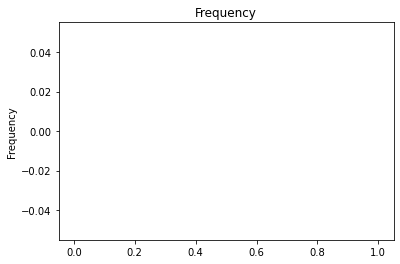

In [67]:
df['frequency'].plot(kind='hist', bins=50)
plt.title('Frequency')
print(df['frequency'].describe())
print(sum(df['frequency'] == 0)/float(len(data)))

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: recency, dtype: float64
0.0


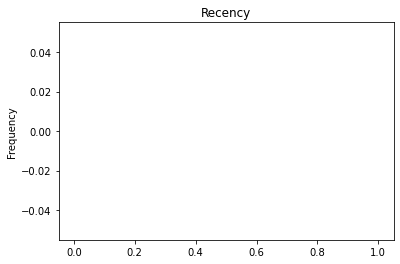

In [68]:
df['recency'].plot(kind='hist', bins=50)
plt.title('Recency')
print(df['recency'].describe())
print(sum(df['recency'] == 0)/float(len(data)))

Among all customers in our data, more than 35% of them only made purchase once (no repeat).
## Frequency/Recency Analysis Using the BG/NBD Model

In [69]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df['frequency'], df['recency'], df['T'])
print(bgf)

ValueError: ignored

In [ ]:
bgf.summary

In [ ]:
from scipy.stats import gamma, beta
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df['frequency'], df['recency'], df['T'], )
print (bgf)
#  
# Plot
gbd = beta.rvs(bgf.params_['a'], bgf.params_['b'], size = 50000)
ggd = gamma.rvs(bgf.params_['r'], scale=1./bgf.params_['alpha'], size = 50000)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Heterogenity of $p$')
temp = plt.hist(gbd, 20,  alpha=0.75)
plt.subplot(122) 
plt.title('Heterogenity of $\lambda$')
temp = plt.hist(ggd, 20,  alpha=0.75)

### Visualizing our frequency/recency matrix
Let's do some hypothetical analysis-
- Customer who purchased every day for four weeks straight, and no transactions in months; chances of that customer being alive is less. 
- On the other hand, a customer who historically made purchase once a quarter, and again last quarter, is likely still alive. We can visualize this relationship using the frequency/recency matrix, which computes the expected number of transactions an artificial customer is to make in the next time period, given the recency (age at last purchase) and frequency (the number of repeat transactions  made).

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(bgf)
plt.show()

We can see that, if a customer has made 120 purchases, and their latest purchase was when they were approximately 350 days old (i.e. Recency: the duration between their first transaction and their latest transaction is 350 days), then they are our best customer (bottom-right).

Customers who have purchased a lot and purchased recently will likely be the best customers in the future. We will never have enough of them.

Customers who have purchased a lot but not recently (top-right corner), have probably gone.
There are also another type of customers that around (40, 100) that represents the customer who buys infrequently, and we have not seen them recently, so they might buy again. However, we are not sure if they have gone or just between purchases.

Another interesting matrix to look at is the probability of still being alive:


In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(10,6))
plot_probability_alive_matrix(bgf)
plt.show()

- Customers who have purchased recently are almost surely “alive”.
- Customers who have purchased a lot but not recently, are likely to have dropped out. And the more they bought in the past, the more likely they have dropped out. They are represented in the upper-right.

### Ranking customers from best to worst
Let’s return to our customers and rank them from “highest expected purchases in the next period” to lowest. Models expose a method that will predict a customer’s expected purchases in the next period using their history.


In [ ]:
t = 10
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df['frequency'], df['recency'], df['T'])
df.sort_values(by='predicted_purchases').tail(10)

Listed above are our top 10 customers that the model expects them to make purchases in the next day. We can see that the customer who has made 131 purchases, and bought very recently from us, is probably going to buy again in the next period.


The predicted_purchases column represents their expected number of purchases while the other three columns represent their current RF metrics. The BG/NBD model believes these individuals will be making more purchases within the near future as they are our current best customers.
#### Assessing model fit
So far, we can predict and we can visualize our customers’ behavior. Now let us assess the model’s correctness. The ﬁrst is to compare your data versus artiﬁcial data simulated with our ﬁtted model’s parameters.


In [ ]:
%%time 

from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(bgf, max_frequency=7)
ax.set_yscale('log')
sns.despine();

We can see that our actual data and our simulated data line up well. 
So, we can continue on with our analysis. We now partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (just like cross-validation in machine learning practice).

### Example using transactional datasets
Most often, the dataset you have at hand will be at the transaction level. Lifetimes has some utility functions to transform that transactional data (one row per purchase) into summary data (a frequency, recency and age dataset).

In [ ]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

transaction_data = load_transaction_data()
print(transaction_data.head())

In [ ]:
summary = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2014-12-31')
print(summary.head())

In [ ]:
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

### More model fitting
With transactional data, we can partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (think cross-validation in standard machine learning literature).

In [ ]:
from lifetimes.utils import calibration_and_holdout_data
pd.get_option("display.max_columns")
summary_cal_holdout = calibration_and_holdout_data(data, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-06-08',
                                        observation_period_end='2011-12-9' )
print(summary_cal_holdout.head())


With this dataset, we can perform ﬁtting on the _cal columns, and test on the _holdout columns:


In [ ]:
%%time 

from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)
sns.despine();

In this plot, we separate the data into both a in-sample (calibration) and validation (holdout) period. The sample period consists the beginning to 2011–06–08; the validation period spans from 2011–06–09 to 2011–12–09. The plot groups all customers in the calibration period by their number of repeat purchases (x-axis) and then averages over their repeat purchases in the holdout period (y-axis). The orange and blue line presents the model prediction and actual result of the y-axis respectively. As we can see, our model is able to predict the customer base’s behaviour out of the sample, the model under-estimates at 4 purchases and after 5 purchases.
### Customer transactions predictions
Based on customer history, we can now predict what an individual’s future purchases might look like:

In [ ]:
t = 10 #predict purchases in 10 periods 
individual = df.loc[12347]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_, to_time` 
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

Our model predicts that customer 12347’s future transaction is 0.157 in 10 days.
#### Customer probability histories

Given a customer transaction history, we can calculate their historical probability of being alive, according to our trained model. For example, we want to look at our best customer’s transactions history and see the probability of being alive:

In [ ]:
t = 1
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df['frequency'], df['recency'], df['T'])
best_projected_cust = df.sort_values('predicted_purchases').tail(6)
df.sort_values(by='predicted_purchases').tail(6)

In [ ]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
id = 14606
days_since_birth = 365
sp_trans = data.loc[data['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')
plt.show()

As per this plot, our best customer is not alive. On the other hand, this customer had only purchased once and has dropped off for a long time with a 100% chance that he is dead.
## Estimating customer lifetime value using gamma-gamma model of monetary value
So far, we didn’t take into account the economic value of each transaction and we focused mainly on transactions’ occurrences. To estimate this we can use the Gamma-Gamma submodel. But ﬁrst we need to create summary data from transactional data also containing economic values for each transaction (i.e. proﬁts or revenues). 

As we are aware by now that, to create a summary dataset which contains information about every customer. We can use the summary_data_from_transaction_data function to generate a summary data frame.

The result contains four columns:

- recency — the time between the first and the last transaction

- frequency — the number of purchases beyond the initial one

- T — the time between the first purchase and the end of the calibration period

- monetary value — the arithmetic mean of customer’s transactions in the calibration period


If we have some customers who did not buy anything in the calibration period and their monetary value in the summary dataset is zero, we must remove them. After that we can build the model. We are only estimating the customers who had at least one repeat purchase with us. Therefore, we are estimating for 2,790 customers.

In [ ]:
summary = df[df['frequency']>0]
print(summary.head())
print()
print('\nCustomers with atleast 1 repeat purchase\n', len(summary))

In [ ]:
summary[['monetary_value', 'frequency']].corr()

### The Gamma-Gamma model and the independence assumption


Gamma-Gamma model is based on the assumption that the number of transactions does not depend on their monetary value. The frequency and monetary value are not correlated if the output is close to zero. The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [ ]:
summary[['monetary_value', 'frequency']].corr()

It seems that we can use the summary to estimate CLTV. We can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.


In [ ]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(summary['frequency'],
        summary['monetary_value'])
print(ggf)

After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 

In [ ]:
print(ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).head(10))

In [ ]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).mean(),
    summary[summary['frequency']>0]['monetary_value'].mean()
))

While for computing the total CLV using the DCF method (https://en.wikipedia.org/wiki/Discounted_cash_ﬂow) adjusting for cost of capital:


In [ ]:
# refit the BG model to the summary_with_money_value dataset 
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(ggf.customer_lifetime_value( 
    bgf, #the model to use to predict the number of future transactions 
    summary['frequency'], 
    summary['recency'], 
    summary['T'], 
    summary['monetary_value'], time=12, # months 
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually 
).head(10)) 

## Saving and loading model
When we have  lots of data and training takes a lot of time option with saving and loading model could be useful. First we need to ﬁt the model, then save it and load.

### Fit model



In [ ]:
from lifetimes import BetaGeoFitter 
from lifetimes.datasets import load_cdnow_summary
data = load_cdnow_summary(index_col=[0]) 
bgf = BetaGeoFitter() 
bgf.fit(summary['frequency'], summary['recency'], summary['T']) 
bgf 

### Saving model
Model will be saved with dill to pickle object. Optional parameters save_data and save_generate_data_method are present to reduce ﬁnal pickle object size for big dataframes. Optional parameters: 
- save_data is used for saving data from model or not (default: True). 
- save_generate_data_method is used for saving generate_new_data method from model or not (default: True)


In [ ]:
bgf.save_model('bgf.pkl')


### Loading model
Before loading we should initialize the model ﬁrst and then use method load_model


In [ ]:
bgf_loaded = BetaGeoFitter() 
bgf_loaded.load_model('bgf.pkl') 
bgf_loaded 

In [ ]:
ggf.save_model('ggf.pkl')

In [ ]:
ggf_loaded = GammaGammaFitter() 
ggf_loaded.load_model('ggf.pkl') 
ggf_loaded 